In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()
df = pd.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
np.random.choice([1,2,3,4,5,6,7,8,9,10], 3) ## 복원 추출

array([1, 2, 1])

In [18]:
np.random.choice([1,2,3,4,5,6,7,8,9,10], 3, replace=False) ## 비복원 추출

array([ 9,  4, 10])

In [20]:
np.random.seed(0)
np.random.choice([1,2,3], 3)

array([1, 2, 1])

In [23]:
np.random.seed(0)
training_sample = np.random.choice(df['AGE'], 20)
training_sample.mean()

58.785

In [24]:
df['AGE'].mean()

68.575

In [31]:
## 무작위 추출로 얻은 표본평균! (5번 20개씩)

for i in range(5):
    sample = np.random.choice(df['AGE'], 20)
    print(f"{i+1}번째 무작위추출로 얻은 표본평균: {sample.mean()}")

1번째 무작위추출로 얻은 표본평균: 65.80499999999999
2번째 무작위추출로 얻은 표본평균: 66.86
3번째 무작위추출로 얻은 표본평균: 69.615
4번째 무작위추출로 얻은 표본평균: 74.68
5번째 무작위추출로 얻은 표본평균: 67.53


In [32]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [39]:
np.random.choice(dice, p=prob)

5

In [64]:
num_trial = 10
sample = np.random.choice(dice, num_trial, p=prob)


In [65]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame(
    {
        'frequency': freq,
        'relative frequency': freq/num_trial
    },
    index = pd.Index(np.arange(1,7), name='dice')
)

,frequency,relative frequency
dice,,
1,0,0.0
2,2,0.2
3,0,0.0
4,1,0.1
5,1,0.1
6,6,0.6


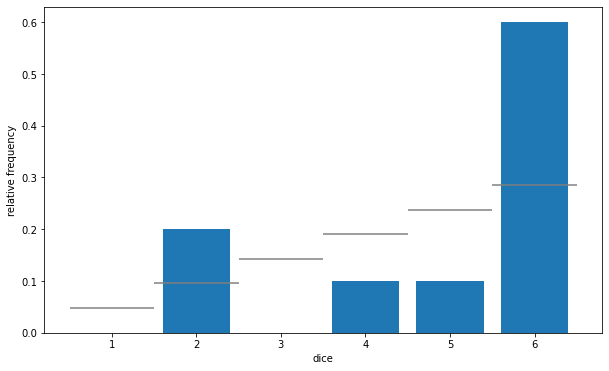

In [66]:
f, ax = plt.subplots(1,1,figsize=(10, 6))

ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), color='gray')

# 막대그래프에 계급값인 [1.5, 2.5, .... 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

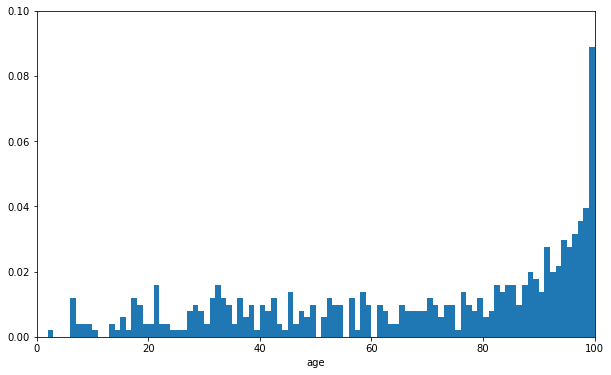

In [77]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(df['AGE'], bins=100, range=(0,100), density=True)

ax.set_xlim(0, 100)
ax.set_ylim(0, 0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

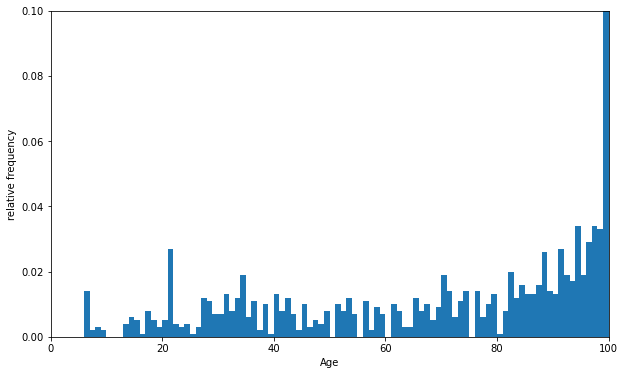

In [88]:
sample = np.random.choice(df['AGE'], 1000)

f, ax = plt.subplots(1,1,figsize=(10, 6))

ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.1)
ax.set_xlabel('Age')
ax.set_ylabel('relative frequency')

plt.show()

In [89]:
df['AGE'].mean()

68.575

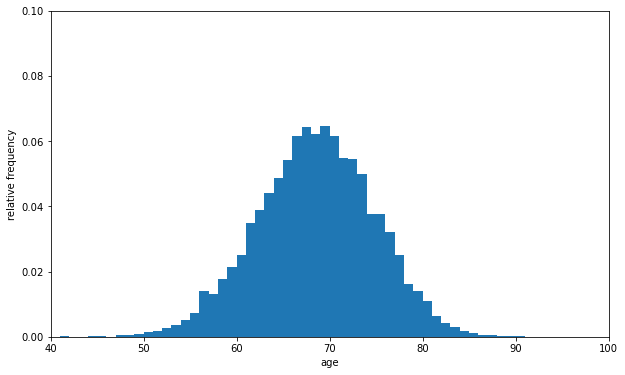

In [100]:
sample_means = [
    np.random.choice(df['AGE'], 20).mean() 
    for _ in range(10000)
]

f, ax = plt.subplots(1,1,figsize=(10, 6))

ax.hist(sample_means, bins=100, range=(0, 100), density=True)
ax.set_xlim(40, 100)
ax.set_ylim(0, 0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')


plt.show()